<a href="https://colab.research.google.com/github/Harshvardhan-Moundekar/Machine_Learning/blob/main/OverviewOfML_P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
file = files.upload()

In [2]:
#import Machine Learning Librarires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras as ke


In [5]:
# Load a sample dataset (e.g., CSV file)
df = pd.read_csv('/content/sample_data/california_housing_test.csv')

# Display the first few rows of the dataframe
print(df.head())

# Check for missing values
print(df.isnull().sum())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.05     37.37                27.0       3885.0           661.0   
1    -118.30     34.26                43.0       1510.0           310.0   
2    -117.81     33.78                27.0       3589.0           507.0   
3    -118.36     33.82                28.0         67.0            15.0   
4    -119.67     36.33                19.0       1241.0           244.0   

   population  households  median_income  median_house_value  
0      1537.0       606.0         6.6085            344700.0  
1       809.0       277.0         3.5990            176500.0  
2      1484.0       495.0         5.7934            270500.0  
3        49.0        11.0         6.1359            330000.0  
4       850.0       237.0         2.9375             81700.0  
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
med

In [7]:
# Model Training and Testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Features and Labels
X = df.drop('households', axis=1).values  # Drop the 'households' column to create features
y = df['households'].values  # Target variable: 'households'

# Split into train and test sets (60-40% ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Standardize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


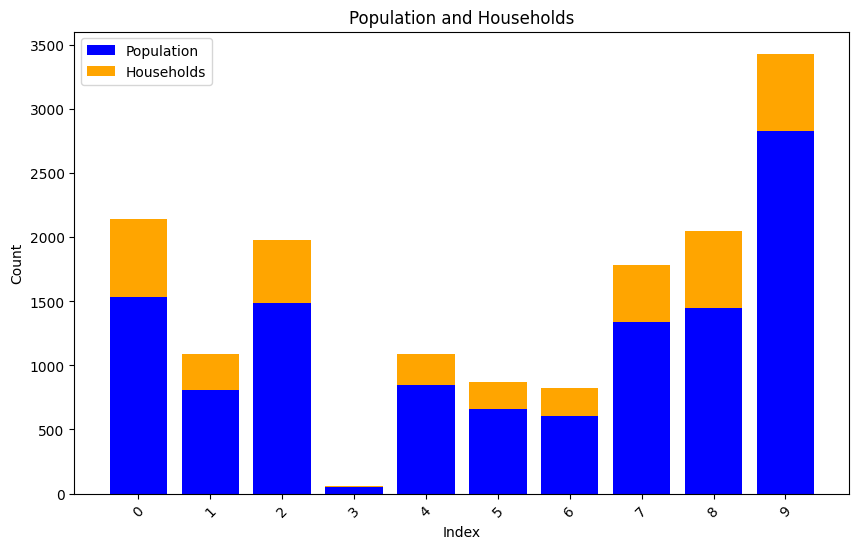

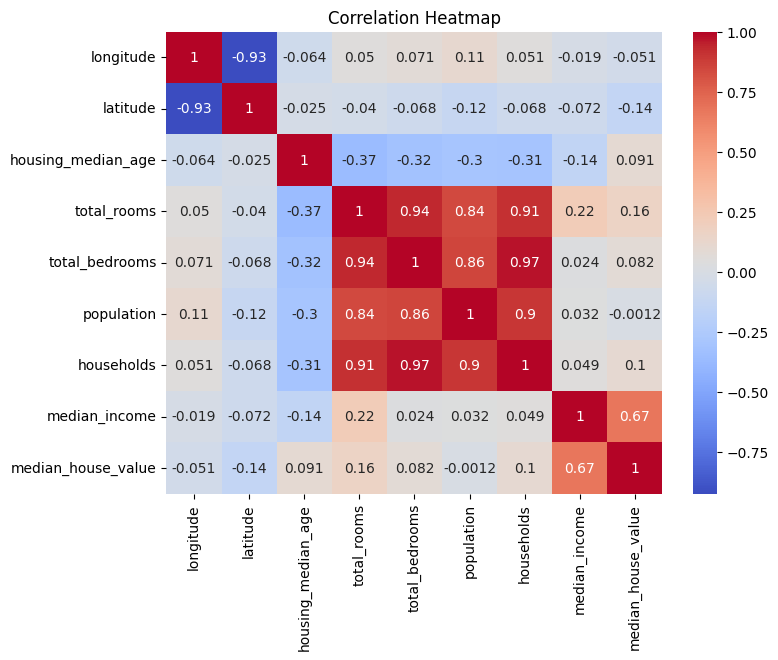

In [13]:
#Data Visualization
df_sample = df.head(10)  # Example for first 10 rows
plt.figure(figsize=(10, 6))
bar_width = 0.5
x = range(len(df_sample))

plt.bar(x, df_sample['population'], color='blue', label='Population')
plt.bar(x, df_sample['households'], bottom=df_sample['population'], color='orange', label='Households')
plt.xticks(ticks=x, labels=df_sample.index, rotation=45)
plt.title('Population and Households')
plt.xlabel('Index')
plt.ylabel('Count')
plt.legend()
plt.show()

# Correlation Heatmap
import seaborn as sns

plt.figure(figsize=(8, 6))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [14]:
# Training Data
import tensorflow as tf

# Build the Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Regression task
])

# Compile the Model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the Model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

# Evaluate the Model
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f'Mean Absolute Error: {mae}')


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 373766.7812 - mae: 487.8736 - val_loss: 377850.9688 - val_mae: 486.8180
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 347373.0000 - mae: 478.7016 - val_loss: 360434.5000 - val_mae: 472.3805
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 330205.5312 - mae: 459.6165 - val_loss: 313962.4688 - val_mae: 437.0676
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 268794.9375 - mae: 416.7779 - val_loss: 228326.2969 - val_mae: 370.5529
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 225036.6875 - mae: 352.0810 - val_loss: 127253.8125 - val_mae: 278.4374
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 103921.5469 - mae: 252.2734 - val_loss: 54757.4648 - val_mae: 187.4498
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 52627.4297 - mae: 183.0040 - val_loss: 26886.8281 - val_mae: 131.4228
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 27272.1328 - mae: 128.3043 - val_loss: 20468.

In [15]:
#Accuracy of Model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 3982.92%
